<a href="https://colab.research.google.com/github/mannmoshe/deep-learning/blob/main/FinalProject/InquiriesClassificationPresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Final Project<br>
## Classify inquieries for customer assistant<br>
By Moshe Mann, Elazar Levzion & Dror Bamberger

## Moshe Mann - data preparation

The goal is to classify inquiries for treatment group.

In [1]:
import pandas as pd
import numpy as np
from itertools import islice
from sklearn.model_selection import train_test_split

filepath = 'https://raw.githubusercontent.com/mannmoshe/deep-learning/main/FinalProject/ca_data.csv'
ca_data = pd.read_csv(filepath, sep=',')

In [2]:
ca_data.head()

,ticketNum,Description,groupTreatment,groupTreatmentCode
0,I-5280814,נושא: RE: 352-0723635 בהוראות התכנית המקוונ...,צוות הדרכה והטמעה אפליקטיבי,2
1,I-5347670,נושא: עדכון תכנית מישיבות היי אלי כבר דיברת...,צוות הדרכה והטמעה אפליקטיבי,2
2,I-5393789,נושא: אפשרות חיפוש בחלונית בחירת ישויות מאוחד...,צוות הדרכה והטמעה אפליקטיבי,2
3,I-6139329,נושא: FW: צרופה לתכנית 553-0674457 ממערכת מבאת...,צוות הדרכה והטמעה אפליקטיבי,2
4,I-5544212,"שלום רב, נושא: השמשת מולטימדיה בחדרי החקירות צ...",צוות טכנאים,1


The ticketNum is shuffeled (Not true data).

In [3]:
counts = ca_data['groupTreatment'].value_counts()
percent = counts / counts.sum()
fmt = '{:.1%}'.format
print('all data distribution:')
pd.DataFrame({'counts': counts, 'per': percent.map(fmt)})

all data distribution:


,counts,per
7878 מרכז שירות ותמיכה טכנולוגית,4455,65.0%
צוות טכנאים,1397,20.4%
צוות הדרכה והטמעה אפליקטיבי,845,12.3%
צוות תשתיות/סיסטם,142,2.1%
תקשורת ואבטחת מידע,8,0.1%
צוות פיקוח על הבניה,3,0.0%
צוות אינטגרציה,2,0.0%
צוות מרכז תמיכה URD,1,0.0%


This is the code of every group, <br>
all the groups with less than 10% of the inquiries have been grouped to one group ("other") <br> and got the same code.  

In [4]:
ca_data[['groupTreatment', 'groupTreatmentCode']].drop_duplicates().sort_values(by=['groupTreatmentCode'])

,groupTreatment,groupTreatmentCode
26,7878 מרכז שירות ותמיכה טכנולוגית,0
4,צוות טכנאים,1
0,צוות הדרכה והטמעה אפליקטיבי,2
6,צוות תשתיות/סיסטם,3
13,צוות מרכז תמיכה URD,3
14,צוות אינטגרציה,3
22,צוות פיקוח על הבניה,3
1888,תקשורת ואבטחת מידע,3


In [5]:
X = ca_data['Description']
y = ca_data['groupTreatmentCode']

In [6]:
x_train_temp, x_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.33, random_state=4, stratify=y)

stratify=y for keeping the same distribution at the train and the test.

In [7]:
print(x_train_temp.head(1), y_train_temp.head(1))
print(x_train_temp.shape, y_train_temp.shape)

405    נושא: דוח של נוכחות חברי ועדה משנה ב' מחוז תל ...
Name: Description, dtype: object 405    0
Name: groupTreatmentCode, dtype: int64
(4591,) (4591,)


In [8]:
print(x_test_temp.head(1), y_test_temp.head(1))
print(x_test_temp.shape, y_test_temp.shape)

455    נושא: היי , אודה לעזרתכם בדבר שליחת הודעה מה H...
Name: Description, dtype: object 455    0
Name: groupTreatmentCode, dtype: int64
(2262,) (2262,)


In [9]:
counts = y_train_temp.value_counts()
percent = counts / counts.sum()
fmt = '{:.1%}'.format
print('y_train distribution:')
pd.DataFrame({'counts': counts, 'per': percent.map(fmt)})

y_train distribution:


,counts,per
0,2985,65.0%
1,936,20.4%
2,566,12.3%
3,104,2.3%


In [10]:
counts = y_test_temp.value_counts()
percent = counts / counts.sum()
fmt = '{:.1%}'.format
print('y_test distribution:')
pd.DataFrame({'counts': counts, 'per': percent.map(fmt)})

y_test distribution:


,counts,per
0,1470,65.0%
1,461,20.4%
2,279,12.3%
3,52,2.3%


### PreProcessing

### **Encoding the input data: One-hot encoding**

Get top 10,000 frequent words from train data.

In [11]:
train_samples = x_train_temp.tolist()
test_samples = x_test_temp.tolist()

In [12]:
from keras.preprocessing.text import Tokenizer

In [13]:
# We create a tokenizer, configured to only take
# into account the top-10000 most common words
tokenizer = Tokenizer(num_words=10000)
# This builds the word index
tokenizer.fit_on_texts(train_samples)

# This turns strings into lists of integer indices.
train_sequences = tokenizer.texts_to_sequences(train_samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
x_train = tokenizer.texts_to_matrix(train_samples, mode='binary')
x_test = tokenizer.texts_to_matrix(test_samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15923 unique tokens.


In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
len(x_train[0])

10000

**Encoding the labels**

In [16]:
train_labels = y_train_temp.to_numpy()
test_labels = y_test_temp.to_numpy()

In [17]:
def to_one_hot(labels, dimension=4):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [18]:
print(train_labels[0], train_labels[5])
print(y_train[0], y_train[5]) 

0 2
[1. 0. 0. 0.] [0. 0. 1. 0.]


### **Encoding the input data: Embedding**

In [19]:
lens = [len(s) for s in train_sequences]

In [20]:
lens[:20]

[41, 7, 31, 9, 26, 37, 23, 35, 41, 32, 38, 34, 39, 7, 37, 11, 17, 27, 27, 26]

In [21]:
sum(lens)/len(lens)

26.93944674362884

average of 27 words to inquiery.

In [22]:
# preprocess train_sequences for embedding layer
# if inquiery is shorter than 27 words we will add zeros
max_len = 27
x_train_embedding = []

for s in train_sequences:
  if len(s) >= 27:
    x_train_embedding.append(s[:27])
  else:
    x_train_embedding.append(s + [0]*(max_len-len(s)))

x_train_embedding = np.array(x_train_embedding)

In [23]:
x_train_embedding[1]

array([   1, 1476,  160, 1771,   63,    6,  341,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

## Dror Bamberger - Model building

### Simple Artificial NN

**Model definition**

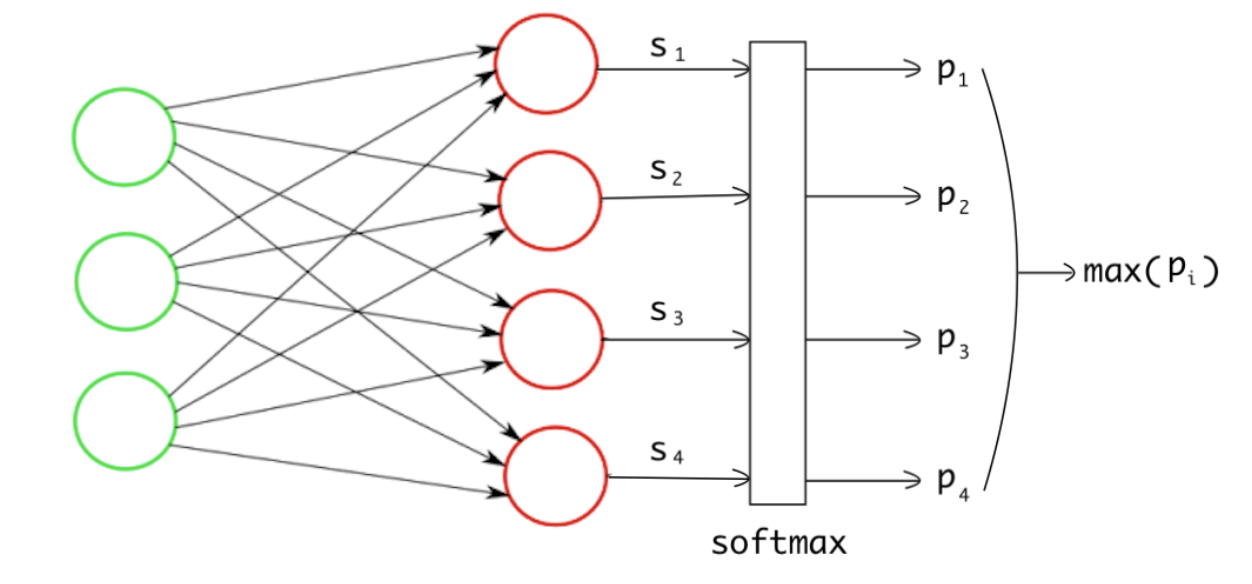

In [24]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="softmax")
])

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets.<br> It is defined as the average of recall obtained on each class.<br>
For further reading see: [balanced_accuracy_score documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html).

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [27]:
from sklearn.utils import class_weight

y_for_weights = np.argmax(partial_y_train, axis=1)
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(y_for_weights),
                                                 y = y_for_weights)
class_weights = {i: c for i, c in enumerate(class_weights)}

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val), 
                    class_weight=class_weights)

Epoch 1/20
8/8 [==============================] - 6s 90ms/step - loss: 1.3251 - accuracy: 0.4394 - val_loss: 1.2379 - val_accuracy: 0.5080
Epoch 2/20
8/8 [==============================] - 0s 27ms/step - loss: 1.0522 - accuracy: 0.6383 - val_loss: 1.0485 - val_accuracy: 0.5740
Epoch 3/20
8/8 [==============================] - 0s 38ms/step - loss: 0.7883 - accuracy: 0.7148 - val_loss: 1.0142 - val_accuracy: 0.5670
Epoch 4/20
8/8 [==============================] - 0s 24ms/step - loss: 0.5859 - accuracy: 0.7577 - val_loss: 0.9110 - val_accuracy: 0.5940
Epoch 5/20
8/8 [==============================] - 0s 22ms/step - loss: 0.4473 - accuracy: 0.8090 - val_loss: 0.8966 - val_accuracy: 0.5910
Epoch 6/20
8/8 [==============================] - 0s 22ms/step - loss: 0.3501 - accuracy: 0.8376 - val_loss: 0.7623 - val_accuracy: 0.6690
Epoch 7/20
8/8 [==============================] - 0s 22ms/step - loss: 0.2735 - accuracy: 0.8889 - val_loss: 0.7504 - val_accuracy: 0.6730
Epoch 8/20
8/8 [===========

In [29]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(np.argmax(y_val, axis=1), np.argmax(model.predict(x_val), axis=1))

0.5898814960888286

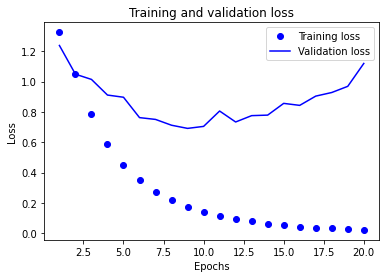

In [30]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

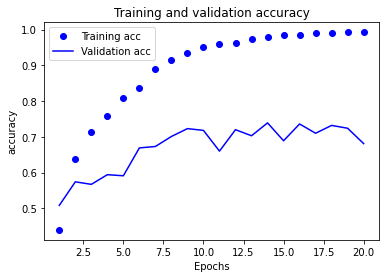

In [31]:
plt.clf() # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [32]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(4, activation="softmax")
])
model.compile(optimizer='rmsprop',
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512,
          class_weight=class_weights)
results = model.evaluate(x_test, y_test)

Epoch 1/9
9/9 [==============================] - 1s 18ms/step - loss: 1.2858 - accuracy: 0.5615
Epoch 2/9
9/9 [==============================] - 0s 19ms/step - loss: 0.9425 - accuracy: 0.7284
Epoch 3/9
9/9 [==============================] - 0s 16ms/step - loss: 0.6533 - accuracy: 0.7794
Epoch 4/9
9/9 [==============================] - 0s 16ms/step - loss: 0.4470 - accuracy: 0.8403
Epoch 5/9
9/9 [==============================] - 0s 15ms/step - loss: 0.3128 - accuracy: 0.8732
Epoch 6/9
9/9 [==============================] - 0s 18ms/step - loss: 0.2266 - accuracy: 0.9068
Epoch 7/9
9/9 [==============================] - 0s 20ms/step - loss: 0.1653 - accuracy: 0.9342
Epoch 8/9
9/9 [==============================] - 0s 18ms/step - loss: 0.1216 - accuracy: 0.9523
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.7525 - accuracy: 0.7042


In [33]:
print('loss:' ,results[0])
print('acc:' ,results[1])

loss: 0.7524874210357666
acc: 0.7042440176010132



This approach reaches an accuracy of ~71%.<br>So the results seem pretty good, at least when compared to
a random baseline, 
which in this case close to 47%:

In [34]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.4827586206896552

#### **Test Results**

In [35]:
predictions = model.predict(x_test)

In [36]:
len(predictions)

2262

In [37]:
treatment_group_predictions = np.array([np.argmax(predictions[i]) for i in range(len(predictions))])

In [38]:
treatment_group_predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0])

In [39]:
test_labels[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0])

**True Positive Rate (Recall) for each class**<br>
number of samples actually and predicted as  `Positive` / total number of samples actually `Positive`  
Also called **Sensitivity or Recall**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


In [40]:
from sklearn.metrics import accuracy_score
print('accuracy: ', accuracy_score(test_labels, treatment_group_predictions))
print('balanced_accuracy: ', balanced_accuracy_score(test_labels, treatment_group_predictions))

accuracy:  0.7042440318302388
balanced_accuracy:  0.6085703501853277


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, treatment_group_predictions)

array([[1090,  190,  163,   27],
       [ 139,  310,    2,   10],
       [  94,   12,  172,    1],
       [  20,    9,    2,   21]])

### Use embedding layer

In [42]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

history = model.fit(x_train_embedding, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.33,
                    class_weight=class_weights)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 216)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                3472      
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 83,540
Trainable params: 83,540
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
49/49 [==============================] - 1s 8ms/step - loss: 1.3882 - accuracy: 0.4621 - val_loss: 1.3322 - val_accuracy: 0.4664
Epoch 2/20
49/49 [========================

## Elazar Levzion - advanced models

### RNN with LSTM

In [43]:
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [44]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=max_len))
model.add(LSTM(64))
model.compile(optimizer='rmsprop',
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.add(Dense(4, activation='softmax'))
model.summary()

history = model.fit(x_train_embedding, y_train,
                    epochs=13,
                    batch_size=64,
                    validation_split=0.33,
                    class_weight=class_weights)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 27, 8)             80000     
                                                                 
 lstm (LSTM)                 (None, 64)                18688     
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 98,948
Trainable params: 98,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/13
49/49 [==============================] - 5s 17ms/step - loss: 1.3885 - accuracy: 0.2059 - val_loss: 1.1722 - val_accuracy: 0.5165
Epoch 2/13
49/49 [==============================] - 0s 7ms/step - loss: 1.2028 - accuracy: 0.5259 - val_loss: 1.0097 - val_accuracy: 0.5224
Epoch 3/13
49/49 [===============

The accuracy has decreased,<br>
probably because the data is not big enough for embedding only by itself.<br>
we will try to use pre-trained embedding layer. 

### alephbert

In [45]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 7.1 MB/s 
     |████████████████████████████████| 6.6 MB 58.1 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 596 kB 70.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [46]:
import torch
from transformers import BertTokenizerFast, BertForSequenceClassification
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

alephbert_tokenizer = BertTokenizerFast.from_pretrained('onlplab/alephbert-base')
alephbert = BertForSequenceClassification.from_pretrained('onlplab/alephbert-base', num_labels=4)
alephbert.to(device)
pass

Downloading:   0%|          | 0.00/288 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/532k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/565 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481M [00:00<?, ?B/s]

Some weights of the model checkpoint at onlplab/alephbert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at onlplab/alephbert-base

In [47]:
from torch import Tensor, nn
import torch
from torch import optim
from sklearn.metrics import accuracy_score

batch_size = 32
epochs = 10
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(alephbert.parameters(), lr=0.000005)

for epoch in range(epochs):
  accuracies = []
  losses = []
  for bech in range(0, len(x_train_temp), batch_size):
    alephbert.train()
    optimizer.zero_grad()

    x_train_i = x_train_temp.iloc[bech:bech+batch_size]
    y_train_i = Tensor(y_train_temp.iloc[bech:bech+batch_size].to_list()).to(device)
    tokenized = alephbert_tokenizer(x_train_i.to_list(), return_tensors="pt", padding=True)
    tokenized = {k: val.to(device) for k, val in tokenized.items()}
    pred = alephbert(**tokenized)

    loss_i = loss(pred['logits'], y_train_i.to(torch.int64))
    loss_i.backward()
    optimizer.step()

    accuracies.append(accuracy_score(y_train_i.cpu().numpy(), pred['logits'].argmax(dim=1).cpu().numpy()))
    losses.append(loss_i.tolist())
    print(f'\rTRAIN epoch: {epoch}, {round(bech / len(x_train_temp) * 100, 2)}%, loss: {round(np.array(losses).mean(), 5)}, accuracy: {round(np.array(accuracies).mean(), 5)}', end='')
  print()

  accuracies = []
  losses = []
  for bech in range(0, len(x_test_temp), batch_size):
    alephbert.eval()

    x_test_i = x_test_temp.iloc[bech:bech+batch_size]
    y_test_i = Tensor(y_test_temp.iloc[bech:bech+batch_size].to_list()).to(device)
    tokenized = alephbert_tokenizer(x_test_i.to_list(), return_tensors="pt", padding=True)
    tokenized = {k: val.to(device) for k, val in tokenized.items()}
    pred = alephbert(**tokenized)

    loss_i = loss(pred['logits'], y_test_i.to(torch.int64))

    accuracies.append(accuracy_score(y_test_i.cpu().numpy(), pred['logits'].argmax(dim=1).cpu().numpy()))
    losses.append(loss_i.tolist())
    print(f'\rTEST epoch: {epoch}, {round(bech / len(x_test_temp) * 100, 2)}%, loss: {round(np.array(losses).mean(), 5)}, accuracy: {round(np.array(accuracies).mean(), 5)}', end='')
  print()

TRAIN epoch: 0, 99.67%, loss: 0.87773, accuracy: 0.65532
TEST epoch: 0, 99.03%, loss: 0.70572, accuracy: 0.71047
TRAIN epoch: 1, 99.67%, loss: 0.64861, accuracy: 0.72889
TEST epoch: 1, 99.03%, loss: 0.6309, accuracy: 0.73207
TRAIN epoch: 2, 99.67%, loss: 0.5608, accuracy: 0.76467
TEST epoch: 2, 99.03%, loss: 0.61036, accuracy: 0.74764
TRAIN epoch: 3, 99.67%, loss: 0.47923, accuracy: 0.80702
TEST epoch: 3, 99.03%, loss: 0.64219, accuracy: 0.75292
TRAIN epoch: 4, 99.67%, loss: 0.40087, accuracy: 0.83981
TEST epoch: 4, 99.03%, loss: 0.64831, accuracy: 0.756
TRAIN epoch: 5, 99.67%, loss: 0.31609, accuracy: 0.87975
TEST epoch: 5, 99.03%, loss: 0.81273, accuracy: 0.74348
TRAIN epoch: 6, 99.67%, loss: 0.25221, accuracy: 0.91059
TEST epoch: 6, 99.03%, loss: 0.8762, accuracy: 0.74108
TRAIN epoch: 7, 99.67%, loss: 0.1984, accuracy: 0.93273
TEST epoch: 7, 99.03%, loss: 0.93228, accuracy: 0.74656
TRAIN epoch: 8, 99.67%, loss: 0.17409, accuracy: 0.94054
TEST epoch: 8, 99.03%, loss: 0.85703, accurac

### Pre-trained Embedding layer

In [48]:
alephbert.bert.embeddings

BertEmbeddings(
  (word_embeddings): Embedding(52000, 768, padding_idx=0)
  (position_embeddings): Embedding(512, 768)
  (token_type_embeddings): Embedding(1, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [49]:
embedding_layer = alephbert.bert.embeddings.word_embeddings

In [50]:
import torch

# ['input_ids'].to(device)
sentence_test = alephbert_tokenizer(x_test_temp.tolist(), padding=True, return_tensors ='pt')
# ['input_ids'].to(device)


In [51]:
def embedder(x):
  sentence = alephbert_tokenizer(x.tolist(), padding=True, return_tensors ='pt')

  sentence_input = sentence['input_ids']
  sentence_mask = sentence['attention_mask']

  x_embedding = embedding_layer(sentence_input.to(device))
  sentence_mask = sentence_mask.to(device)
  x_embedding = (x_embedding * sentence_mask.unsqueeze(-1)).sum(axis=1).T / sentence_mask.sum(axis=1)
  return x_embedding.T.detach().cpu().numpy()

In [52]:
x_train_embedding = embedder(x_train_temp)
x_test_embedding = embedder(x_test_temp)

In [53]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(x_train_embedding.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="softmax")
])

In [54]:
model.compile(optimizer= keras.optimizers.adam_v2.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
x_val = x_train_embedding[:1000]
partial_x_train = x_train_embedding[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [56]:
from sklearn.utils import class_weight

y_for_weights = np.argmax(partial_y_train, axis=1)
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(y_for_weights),
                                                 y = y_for_weights)
class_weights = {i: c for i, c in enumerate(class_weights)}

In [57]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    steps_per_epoch=5,
                    validation_data=(x_val, y_val), class_weight=class_weights)

Epoch 1/50
5/5 [==============================] - 1s 77ms/step - loss: 1.3850 - accuracy: 0.1055 - val_loss: 1.3934 - val_accuracy: 0.1450
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 1.3785 - accuracy: 0.1618 - val_loss: 1.3928 - val_accuracy: 0.1520
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 1.3707 - accuracy: 0.1640 - val_loss: 1.3861 - val_accuracy: 0.1560
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 1.3602 - accuracy: 0.2122 - val_loss: 1.3792 - val_accuracy: 0.3060
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 1.3476 - accuracy: 0.3253 - val_loss: 1.3768 - val_accuracy: 0.3260
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 1.3328 - accuracy: 0.3381 - val_loss: 1.3680 - val_accuracy: 0.3390
Epoch 7/50
5/5 [==============================] - 0s 23ms/step - loss: 1.3144 - accuracy: 0.3562 - val_loss: 1.3569 - val_accuracy: 0.3670
Epoch 8/50
5/5 [===========

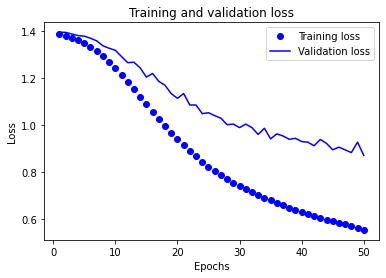

In [58]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

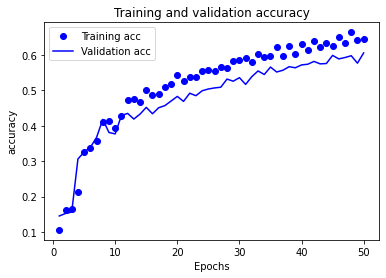

In [59]:
plt.clf() # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [60]:
results = model.evaluate(x_test_embedding, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.8680 - accuracy: 0.6052
